In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure
import os
from PIL import Image


from skimage.color import rgb2gray
from skimage import data

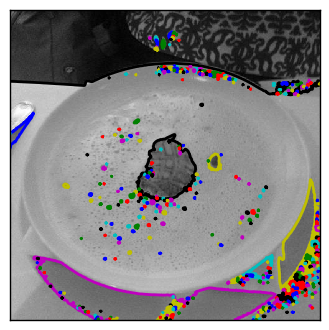

In [14]:
img=np.array(Image.open('./photos/4505.jpg'))
img_gray = rgb2gray(img)
# Find contours at a constant value of x
contours = measure.find_contours(img_gray, .5)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img_gray,interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
   ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [4]:
# gives the strength of the contrast (1 lowest, 0  highest)

contrast_strength= 0.5

# Construct image in array shape
arraydirectory= '../FeatureSampleFoodClassification/con_array_' + str(contrast_strength) + '/'
photodirectory='../SampleFoodClassifier_Norm/'

if not os.path.exists(arraydirectory):
    os.makedirs(arraydirectory)

for fn in os.listdir(photodirectory):
    if os.path.isfile(photodirectory + fn) and '.jpg' in fn:
        img=np.array(Image.open(photodirectory + fn))
        img_gray = rgb2gray(img)
        # Find contours at a constant value of contrast_strength
        contours = measure.find_contours(img_gray, contrast_strength)
        contours_flat=[item for sublist in contours for item in sublist]
        np.save(arraydirectory + fn,contours_flat)

print('done')

done
